# XGB model hyperparameters tuning

- `xgboost.cv`
- Comparing the optimal candidates by test set, using the g-research weighted correlation metrics.

## 1. cv tuned model folders

- `model_nof_{version number}`

In [1]:
import os
os.listdir('./trainedXGB/')

['XGB0',
 'model_nof_19',
 'model_nof_17',
 'model_nof_16',
 'model_nof_18',
 '.DS_Store',
 'model_nof_14',
 'model_nof_13',
 'model_nof_15']

## 2. organized data set  

- new_data.ftr

In [2]:
import pandas as pd
import gc
df_train = pd.read_feather('./data'+'/new_data.ftr')

In [3]:
for i in range(14):
    range_crypto=pd.to_datetime(df_train.loc[df_train['Asset_ID']==i,'timestamp'],unit="s",infer_datetime_format=True).describe(datetime_is_numeric=True)[['min','max']]
    print(f'Asset_ID={i}. \n {range_crypto}')

Asset_ID=0. 
 min    2017-11-06 00:15:00
max    2021-11-26 23:43:00
Name: timestamp, dtype: object
Asset_ID=1. 
 min    2017-08-17 00:15:00
max    2021-11-26 23:43:00
Name: timestamp, dtype: object
Asset_ID=2. 
 min    2018-01-01 00:16:00
max    2021-11-26 23:43:00
Name: timestamp, dtype: object
Asset_ID=3. 
 min    2018-04-17 00:15:00
max    2021-11-26 23:43:00
Name: timestamp, dtype: object
Asset_ID=4. 
 min    2019-04-12 14:51:00
max    2021-11-26 23:43:00
Name: timestamp, dtype: object
Asset_ID=5. 
 min    2018-01-01 00:16:00
max    2021-11-26 23:43:00
Name: timestamp, dtype: object
Asset_ID=6. 
 min    2017-08-17 00:15:00
max    2021-11-26 23:43:00
Name: timestamp, dtype: object
Asset_ID=7. 
 min    2018-01-01 00:18:00
max    2021-11-26 23:43:00
Name: timestamp, dtype: object
Asset_ID=8. 
 min    2018-05-09 08:23:00
max    2021-11-26 23:43:00
Name: timestamp, dtype: object
Asset_ID=9. 
 min    2017-12-13 00:15:00
max    2021-11-26 23:43:00
Name: timestamp, dtype: object
Asset_ID=1

## 3. Features

In [4]:
from script.XGB.xgbmodel import get_features
pd.options.mode.chained_assignment = None  # default='warn'
get_features(df_train[df_train['Asset_ID']==5],lagfeatures=True)

,index,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,...,lrtn_index_5,lrtn_index_15,vol_sum_15,vol_delta_15,vol_pressure_1,vol_pressure_15,rsi_15,macd_15_30,close_bollinger_up_15,close_bollinger_down_15
9499635,9499635,1514765760,5,4.0,7.5702,7.5730,7.5702,7.5702,247.913300,7.570237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
9499636,9499636,1514765940,5,1.0,7.5400,7.5400,7.5400,7.5400,484.860596,7.540000,...,NaN,NaN,NaN,NaN,-484.860596,NaN,NaN,-0.001827,NaN,NaN
9499637,9499637,1514766000,5,35.0,7.5359,7.5359,7.5000,7.5250,6254.602539,7.512563,...,NaN,NaN,NaN,NaN,-6254.602539,NaN,NaN,-0.004214,NaN,NaN
9499638,9499638,1514766060,5,15.0,7.5041,7.5254,7.5000,7.5254,2502.310791,7.505142,...,NaN,NaN,NaN,NaN,2502.310791,NaN,NaN,-0.006111,NaN,NaN
9499639,9499639,1514766120,5,64.0,7.5092,7.5175,7.4507,7.4919,13151.284180,7.483400,...,NaN,NaN,NaN,NaN,-13151.284180,NaN,NaN,-0.009640,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11549640,11549640,1637969940,5,113.0,3.8790,3.8790,3.8600,3.8630,26508.500000,3.869500,...,0.003546,0.000502,186545.201172,9083.900391,-26508.500000,186545.201172,52.777750,-0.003272,0.017374,0.022973
11549641,11549641,1637970000,5,107.0,3.8630,3.8670,3.8590,3.8590,16279.299805,3.863000,...,0.001838,0.000028,185553.901367,-991.299805,-16279.299805,-185553.901367,47.222250,-0.003432,0.021054,0.019187
11549642,11549642,1637970060,5,90.0,3.8580,3.8590,3.8500,3.8530,7815.000000,3.854500,...,-0.001859,-0.000247,185008.701172,-545.200195,-7815.000000,-185008.701172,45.333342,-0.003897,0.026903,0.013969
11549643,11549643,1637970120,5,145.0,3.8510,3.8570,3.8390,3.8390,15173.599609,3.848000,...,-0.005037,-0.001647,192219.600586,7210.899414,-15173.599609,-192219.600586,39.534806,-0.005094,0.042276,0.003742


## 4. Test set range

- train set range is after `df_train['timestamp'].quantile(0.5)`
- test set

In [5]:
df_train['timestamp'].quantile(0.5)

1581021420.0

In [6]:
pd.to_datetime(df_train['timestamp'].quantile(0.5),unit="s",
               infer_datetime_format=True)

Timestamp('2020-02-06 20:37:00')

In [7]:
import datetime
import time

test_days= 30*3
#out-train test
test_end= df_train['timestamp'].quantile(0.5) - 60
test_start= test_end - 60*(test_days*24*60)
df_test = df_train[(test_start<=df_train['timestamp'])& (df_train['timestamp']<=test_end)]
df_test = get_features(df_test,lagfeatures=True)
df_test.dropna(axis = 0, inplace= True)

#in-train test
test_end2= df_train['timestamp'].quantile(0.9) - 60
test_start2= test_end2 - 60*(test_days*24*60)
df_test2 = df_train[(test_start2<=df_train['timestamp'])& (df_train['timestamp']<=test_end2)]
df_test2 = get_features(df_test2,lagfeatures=True)
df_test2.dropna(axis = 0, inplace= True)

del df_train
gc.collect()
# print([test_start,test_end])
# pd.to_datetime([test_start,test_end],
#                unit="s", infer_datetime_format=True)

0

In [8]:
df_test.head()

,index,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,...,lrtn_index_5,lrtn_index_15,vol_sum_15,vol_delta_15,vol_pressure_1,vol_pressure_15,rsi_15,macd_15_30,close_bollinger_up_15,close_bollinger_down_15
1035383,1035383,1573246320,0,11.0,19.572300,19.583700,19.572300,19.583700,269.899994,19.577291,...,0.311184,0.271153,2911.542786,205.429993,269.899994,2911.542786,53.658108,0.000228,0.014521,0.032048
1035384,1035384,1573246380,0,7.0,19.574499,19.584900,19.574499,19.578300,110.669998,19.584255,...,0.105656,0.133345,2983.222783,71.679996,-110.669998,-2983.222783,47.556684,0.000527,0.018626,0.026420
1035385,1035385,1573246440,0,14.0,19.584900,19.590500,19.583700,19.590000,222.899994,19.588959,...,0.000362,0.003631,3032.492772,49.269989,222.899994,3032.492772,51.347391,0.001476,0.008007,0.038574
1035386,1035386,1573246500,0,17.0,19.589701,19.589701,19.554800,19.566299,561.710022,19.575954,...,-0.130103,-0.029899,2963.032811,-69.459961,-561.710022,-2963.032811,46.374951,0.000807,0.030937,0.015969
1035387,1035387,1573246560,0,4.0,19.564400,19.581699,19.564400,19.577299,154.119995,19.581112,...,-0.000307,0.068273,3114.531306,151.498495,154.119995,3114.531306,52.071316,0.000918,0.020397,0.026362


In [9]:
from script.data_target import ResidualizeMarket
#ResidualizeMarket(df=df_test, mktColumn='Close', window=15)

## Performance on test set

In [10]:
import xgboost as xgb
from os.path import exists

ASSET_DETAILS_CSV = './data/asset_details.csv'
df_asset_details = pd.read_csv(ASSET_DETAILS_CSV).sort_values("Asset_ID")

def model_reload_train(param_version):
    models = {}
    for asset_id, asset_name in zip(df_asset_details['Asset_ID'], df_asset_details['Asset_Name']):
        model_file = f"./trainedXGB/model_nof_{param_version}/model_{asset_id}.json"
        if exists(model_file):
            model = xgb.Booster()
            model.load_model(model_file)
            models[asset_id] = model
    return models

In [11]:
from script.weighted_corr_metrics import weighted_correlation

result = []
result2 = []
for version_num in [18,19]:
    models=model_reload_train(param_version= version_num)
    result_id=[]
    result_id2=[]
    for id in range(0,14):
        model = models[id]
        x = df_test[df_test['Asset_ID']==id]
        x['Pred'] = model.predict(xgb.DMatrix(x[model.feature_names]))
        result_id.append(x[['timestamp','Asset_ID','Weight','Target','Pred']])
        x2 = df_test2[df_test2['Asset_ID']==id]
        x2['Pred2'] = model.predict(xgb.DMatrix(x2[model.feature_names]))
        result_id2.append(x2[['timestamp','Asset_ID','Weight','Target','Pred2']])
        
    result.append(pd.concat(result_id, axis=0))
    result2.append(pd.concat(result_id2, axis=0))
    score=weighted_correlation(a=result[-1]['Target'], 
                     b=result[-1]['Pred'], 
                     weights=result[-1]['Weight'])
    score2=weighted_correlation(a=result2[-1]['Target'], 
                     b=result2[-1]['Pred2'], 
                     weights=result2[-1]['Weight'])
    print(f"features: {models[0].feature_names}")
    print(f'model_nof_{version_num} finished. Out-train-score:{score}, In-train-score:{score2}')

features: ['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP', 'Crypto_Index', 'Upper_Shadow', 'Lower_Shadow', 'lrtn_close_5', 'lrtn_index_5', 'lrtn_close_15', 'lrtn_index_15']
model_nof_18 finished. Out-train-score:0.022074617685266956, In-train-score:0.46667846165608745
features: ['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP', 'lr_15', 'Mkt_lrt_15', 'Crypto_Index', 'Upper_Shadow', 'Lower_Shadow', 'lrtn_close_5', 'lrtn_close_15', 'lrtn_index_5', 'lrtn_index_15', 'vol_sum_15', 'vol_delta_15', 'vol_pressure_1', 'vol_pressure_15', 'rsi_15', 'macd_15_30', 'close_bollinger_up_15', 'close_bollinger_down_15']
model_nof_19 finished. Out-train-score:0.03726479322222408, In-train-score:0.4487526878062346


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

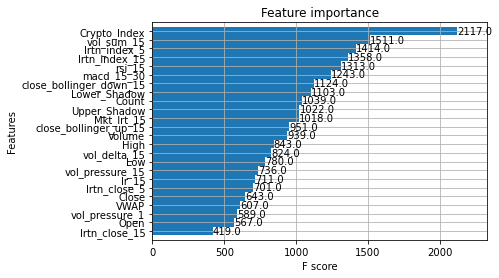

In [20]:
xgb.plot_importance(models[2],importance_type='weight',height=1)

In [14]:
models[0].feature_names

['Count',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'VWAP',
 'lr_15',
 'Mkt_lrt_15',
 'Crypto_Index',
 'Upper_Shadow',
 'Lower_Shadow',
 'lrtn_close_5',
 'lrtn_close_15',
 'lrtn_index_5',
 'lrtn_index_15',
 'vol_sum_15',
 'vol_delta_15',
 'vol_pressure_1',
 'vol_pressure_15',
 'rsi_15',
 'macd_15_30',
 'close_bollinger_up_15',
 'close_bollinger_down_15']